In [2]:
import sys
import mpmath
sys.modules['sympy.mpmath'] = mpmath

In [3]:
#%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.path.abspath("../../test/"))
from DrLi_gorgeous_plotlib import *
#from Math import Math
import scipy.integrate as integrate
#from Light import Light
#from Surface import Surface
#from Physical import Physical
#from Tree import *
from sympy import *

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pypolar.fresnel as fresnel

### test snell example from the document

In [3]:
from test_snell import *

ModuleNotFoundError: No module named 'test_snell'

In [4]:
def test1():
    surface1 = Surface(np.array([0, 0, 0]), np.array(
        [0, 0, 1]), Surface().get_n_air(), Surface().get_n_water())
    print

    list_surface = [surface1]

    light_i = Light(np.array([0, 0, 1]), np.array([0.2, 0.2, -0.9]))

    Physical().run_plot(list_surface, light_i)

In [5]:
# light
light_i = Light(np.array([-3, 5, 3]), np.array([1, 0, 0]))
# surface
surface = Surface(np.array([0, 1, 0]), np.array(
    [0, 0, 1]), Surface().get_n_air(), Surface().get_n_water())
list_surface = [surface]
# run
Physical().run_plot(list_surface, light_i, 1, 5)

NameError: name 'Light' is not defined

In [219]:
x, y, z, t = symbols('x y z t')
print(surface.get_eqn(x,y,z),Surface().get_n_air(), Surface().get_n_water())  # p = [0,0,0], xyz - p = 0, means the surface is horizontal.
list_surface = [surface]

Eq(z, 0) 1 1.333


In [8]:
s = np.array([-1, -1, 1])  # start point
v = np.array([0.8, 0, -0.9])  # speed vector
t = np.array([0,10,1])  # time
light_i = Light(s, v, t)

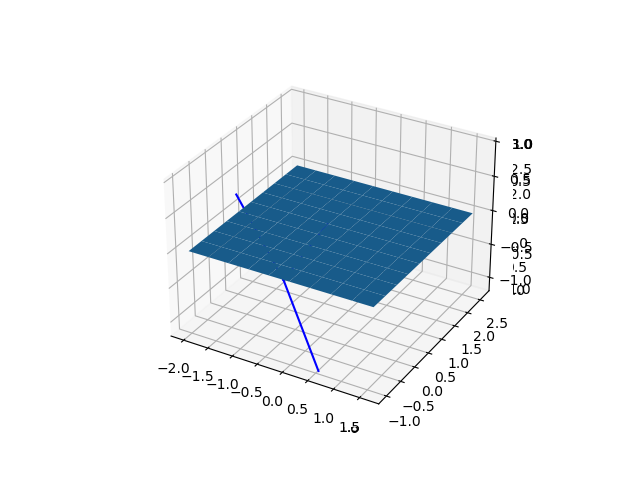

In [9]:
Physical().run_plot(list_surface, light_i)

## 1. refraction : transmission

In [2]:
def transmisson(n,v_i, n1=1, n2=1.3330):
    # from air to water
    # in parameter will get error, when set n1, n2 to n_air and n_water, so directly use value
    # return the transmisson light

    # # set n1,n2 must judge the light way with n
    # if np.dot(n, v_i) < 0:
    #     n1 = n1
    #     n2 = n2
    # else:
    #     n2 = 1
    #     n1 = 1.3330
    #     n = -n

    # sin（theta1),sin(theta2),cos(theta1),cos(theta2)
    cos1 = np.dot(-v_i, n)/sqrt(np.dot(v_i, v_i)*np.dot(n, n))
    sin1 = sqrt(1-cos1**2)
    sin2 = n1*sin1/n2
    cos2 = sqrt(1-sin2**2)

    # calculate brust angle
    sin2_b = 1
    sin1_b = n2*sin2_b/n1

    # check special case, n vector is equal with -v_i, directly trans
    if (np.cross(n, -v_i) == [0, 0, 0]).all():
        v_t = v_i
    else:
        # check brust case
        if (n1 >= n2) & (sin1 >= sin1_b):
            v_t = np.array([0, 0, 0])

        # normal case
        else:
            v_tx = np.cross(np.cross(n, v_i), n)*n1/n2
            v_ty = -sqrt(np.dot(v_i, v_i)-np.dot(v_tx, v_tx))*n

            v_t = v_tx+v_ty
    light_t = np.array([v_t[0], v_t[1], v_t[2]])
    return light_t

In [3]:
v_i = np.array([0.6, 0, -1])
n_s = np.array([0, 0, 1])
light_t = transmisson(n_s,v_i)
light_t

array([0.450112528132033, 0, -1.07582466602072], dtype=object)

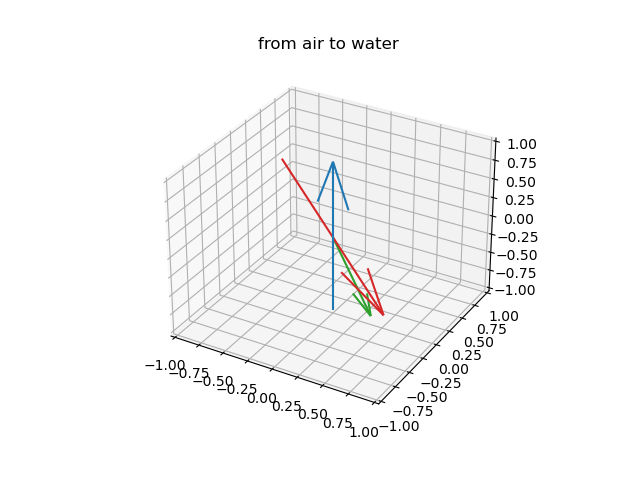

In [218]:
%matplotlib ipympl
fig = plt.Figure()
ax = plt.axes(projection='3d')
ax.quiver(0,0,0, v_i[0],v_i[1],v_i[2], color="C3", pivot='middle', length=2, normalize=True)  # scale=5, width=.015
ax.quiver(0,0,-1, n_s[0],n_s[1],n_s[2], color="C0", pivot='tail', length=2, normalize=True)  # scale=5, width=.015
ax.quiver(0,0,0, light_t[0],light_t[1],light_t[2], color="C2", pivot='tail', length=1, normalize=True)  # scale=5, width=.015
# 'tail', 'mid', 'middle', 'tip'
ax.set(xlim=(-1,1), ylim=(-1,1), zlim=(-1,1))
plt.title("from air to water")
plt.show()

## 2. reflection: reflectance

In [5]:
from sympy import symbols, Eq, Matrix, solve
def reflection2(n_s,light_i):
    # Define the symbols for the variables to be solved
    x_r, y_r, z_r = symbols('x_r y_r z_r')
    # Create a matrix of the variables
    v_rs = Matrix([x_r, y_r, z_r])
    v_i = Matrix([light_i[0], light_i[1], light_i[2]])
    n = Matrix([n_s[0], n_s[1], n_s[2]])

    # Define the equations
    eq1 = Eq((-v_i).dot(n), v_rs.dot(n))
    eq2 = Eq((-v_i + v_rs).cross(n)[0], 0)
    eq3 = Eq((-v_i + v_rs).cross(n)[1], 0)
    eq4 = Eq((-v_i + v_rs).cross(n)[2], 0)

    # Solve the equations to find the values of v_rs
    sol = solve([eq1, eq2, eq3, eq4], (x_r, y_r, z_r))
    if type(sol) == dict:
        v_r = np.array([sol[x_r], sol[y_r], sol[z_r]])
    else:
        v_r = next(iter(sol))
    return v_r

In [6]:
v_i = np.array([1, 0, 1])
n_s = np.array([0, 0, -1])
light_r = reflection2(n_s,v_i)
light_r

array([1, 0, -1], dtype=object)

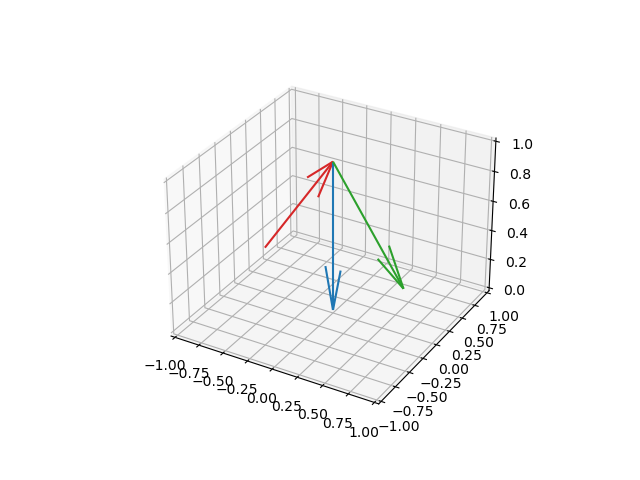

In [245]:
%matplotlib ipympl
fig = plt.Figure()
ax = plt.axes(projection='3d')
ax.quiver(0,0,1, v_i[0],v_i[1],v_i[2], color="C3", pivot='tip', length=1, normalize=True)  # scale=5, width=.015
ax.quiver(0,0,1, n_s[0],n_s[1],n_s[2], color="C0", pivot='tail', length=1, normalize=True)  # scale=5, width=.015
ax.quiver(0,0,1, light_r[0],light_r[1],light_r[2], color="C2", pivot='tail', length=1, normalize=True)  # scale=5, width=.015
# 'tail', 'mid', 'middle', 'tip'
ax.set(xlim=(-1,1), ylim=(-1,1), zlim=(0,1))
plt.show()

### Fresnel - Complex Refractive Index of Water

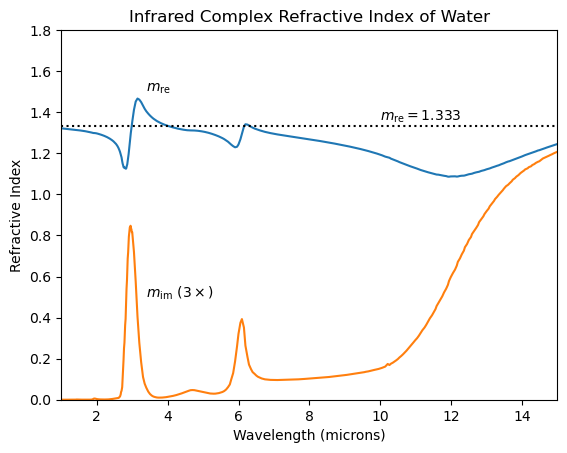

In [4]:
%matplotlib inline
#import the Segelstein data
h2o = np.genfromtxt('https://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

#plot it
plt.plot(h2o_lam,h2o_mre)
plt.plot(h2o_lam,h2o_mim*3)
plt.plot((1,15),(1.333,1.333),':k')
plt.xlim((1,15))
plt.ylim((0,1.8))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(3.4,1.5))
plt.annotate(r'$m_\mathrm{im}\,\,(3\times)$', xy=(3.4,0.5))
plt.annotate(r'$m_\mathrm{re}=1.333$', xy=(10,1.36))

plt.title('Infrared Complex Refractive Index of Water')

plt.show()

In [5]:
print(f"from {h2o_lam.min()} to {h2o_lam.max()} microns")

from 0.01 to 10000000.0 microns


### absorpion calculation of water

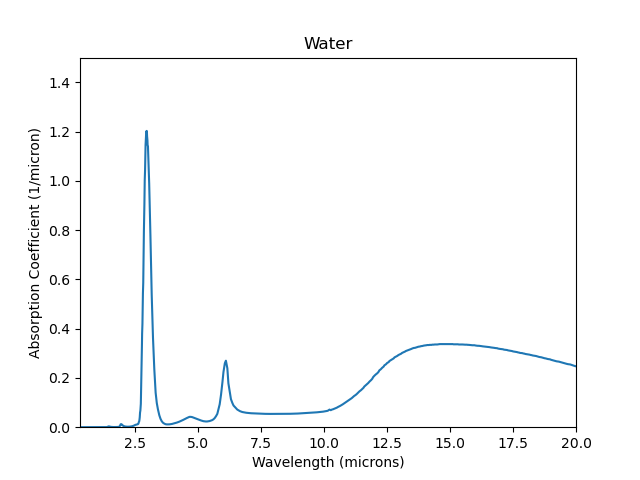

In [ ]:
%matplotlib notebook

mua = 4*np.pi* h2o_mim/h2o_lam

plt.plot(h2o_lam,mua)
plt.xlim((0.3,20))
plt.ylim((0,1.5))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Absorption Coefficient (1/micron)')

plt.title('Water')

plt.show()

## reflectance

For dielectric materials (glass,water,etc.) the index is real m = n -ij. (i=o)

for water at near-UV to near-IR wavelengths, j = 0
However j can be of order 0.1 to 1 at some UV and far-IR wavelengths, in which case the complex index of refraction must be used.

In [5]:
%matplotlib inline
lamb = 3
i = np.argmin(np.abs(h2o_lam - lamb))  # find 3 microns
m = complex(h2o_mre[i], -h2o_mim[i])
print(m)

N=100
theta = np.linspace(0,90,N)
theta0 = theta*np.pi/180

#Rp = fresnel.R_par(m, theta, deg=True)
#Rs = fresnel.R_per(m, theta, deg=True)
R0 = fresnel.R_unpolarized(m, theta0, h2o_mre[i], deg=False)
R = fresnel.R_unpolarized(m, theta, h2o_mre[i], deg=True)  # reflection in the water, if in air n=1
T = fresnel.T_unpolarized(m, theta, h2o_mre[i], deg=True)  # refraction the water, if in air n=1

#plt.plot(theta,Rp,label="parallel to the plane of incidence")
#plt.plot(theta,Rs,label="perpendicular to the plane")
plt.plot(theta,R0,label="unpolarized R0")
plt.plot(theta,R,label="unpolarized R")
plt.plot(theta,T,label="unpolarized T")
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.annotate('Rs',  xy=(76, 0.6))
plt.annotate('R',  xy=(68, 0.2))
plt.annotate('Rp',  xy=(70, 0.01))
plt.title("3 micrio light")
plt.xticks([0,15,30,45,60,75,90])
plt.legend()

plt.show()

NameError: name 'h2o_lam' is not defined

Conservation of energy :
fraction of the incident energy tranmitted:
$$
T = 1 - R
$$

Irradiance after transmitted:
$$
E_r = E_0 \times R
$$
    

## the shortwave band 's transmittance

from the air to water

In [6]:
dnu = 5
nu = np.arange(2000, 33333+5, dnu)
lamb = 1/nu*10000  # cm-1 to um
lam = lamb[::-1]
lam

array([0.299985  , 0.30003   , 0.30007502, ..., 4.97512438, 4.98753117,
       5.        ])

In [7]:
#import the Segelstein data
h2o = np.genfromtxt('https://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

h2o_re = np.interp(lam, h2o_lam, h2o_mre)
h2o_im = np.interp(lam, h2o_lam, h2o_mim)
h2o_complex = np.vectorize(complex)(h2o_re, -h2o_im)

In [8]:
h2o_lam

array([1.000e-02, 1.099e-02, 1.199e-02, ..., 9.795e+06, 9.908e+06,
       1.000e+07])

In [9]:
N=100
theta = np.linspace(0,90,N)
theta0 = theta*np.pi/180
R = np.zeros([h2o_im.shape[0],len(theta0)])
ang_R = np.zeros(h2o_im.shape[0]) + 90
for i in range(len(h2o_re)):
    R[i,:] = fresnel.R_unpolarized(h2o_complex[i], theta0, 1.003, deg=False)
    #ang_R[i] = fresnel.critical(h2o_complex[i], 1, deg=True)
print(ang_R)

[90. 90. 90. ... 90. 90. 90.]


### 1. air into water, reflectance spectrum

In [10]:
from matplotlib import ticker, cm
from matplotlib import colors
import matplotlib.pyplot as mpl
fig_dir = "../../figure/"

In [11]:
fontfml = "Times New Roman"
font=15
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 15
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
fontfml='Times New Roman'

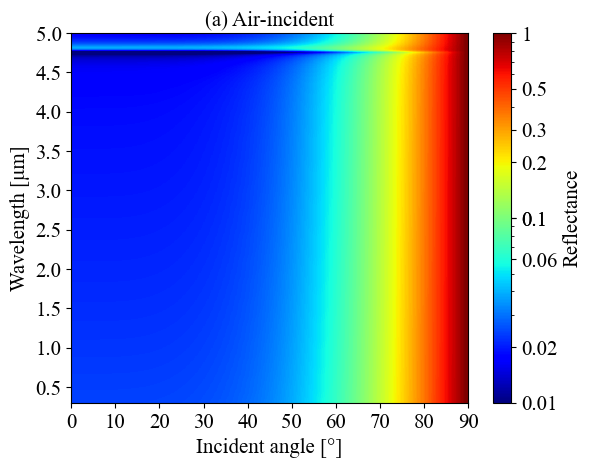

In [16]:
%matplotlib inline
fig = plt.subplots()


norm = colors.LogNorm(1e-2,1)
im=plt.imshow(R, extent = [theta[0],theta[-1],lam[0],lam[-1]],origin='lower',norm=norm, cmap=cm.jet, aspect='auto')  #'viridis' #cm.jet
# Defining the colorbar
cbar = plt.colorbar(im)
# Define the tick locations and then set them
ticks = [1e-2, 0.02,0.06, 1e-1, 0.1, 0.2,0.3, 0.5, 1]
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(tick) for tick in ticks])
cbar.set_label('Reflectance')  # Set the colorbar label
plt.xticks(np.arange(0, 91, 10))  # 91 is used to include 90 in the ticks
plt.yticks(np.arange(0.5, 5.5, 0.5))

plt.xlabel("Incident angle [°]",fontsize=15)
plt.ylabel("Wavelength [μm]")
plt.title('(a) Air-incident',fontsize=15)
#plt.savefig(fig_dir+'air_incident.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [17]:
R2 = np.zeros([h2o_im.shape[0],len(theta0)])
ang_R2 = np.zeros(h2o_im.shape[0])
for i in range(len(h2o_re)):
    R2[i,:] = fresnel.R_unpolarized(1.003, theta0, h2o_re[i], deg=False)
    ang_R2[i] = fresnel.critical(1, h2o_re[i], deg=True)
print(ang_R2)

[46.81743701 46.81809036 46.81874394 ... 49.93628105 49.95559672
 49.97502783]


### 2. water into air, reflectance spectrum

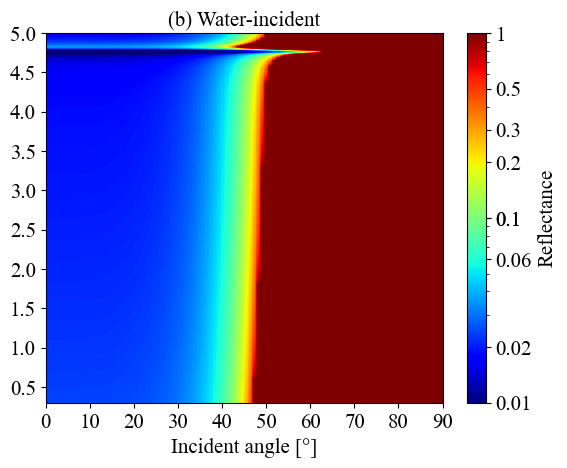

In [18]:
%matplotlib inline
fig = plt.subplots()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 15
norm = colors.LogNorm(1e-2,1)
im=plt.imshow(R2, extent = [theta[0],theta[-1],lam[0],lam[-1]],norm=norm,origin='lower',cmap=cm.jet, aspect='auto')  #'viridis' #cm.jet
# Defining the colorbar
cbar = plt.colorbar(im)
# Define the tick locations and then set them
ticks = [1e-2, 0.02,0.06, 1e-1, 0.1, 0.2,0.3, 0.5, 1]
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(tick) for tick in ticks])
cbar.set_label('Reflectance')  # Set the colorbar label
plt.xticks(np.arange(0, 91, 10))  # 91 is used to include 90 in the ticks
plt.yticks(np.arange(0.5, 5.5, 0.5))
cbar.set_label('Reflectance')  # Set the colorbar label
plt.xlabel("Incident angle [°]")
#plt.ylabel("Wavelength [μm]")
plt.title('(b) Water-incident',fontsize=15)
#plt.savefig(fig_dir+'water_incident.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

## Fraction of reflected energy

In [19]:
data = np.genfromtxt('../../data/profiles/ASTMG173.csv', delimiter=',', skip_header=1,  # in wavenumber basis
                     names=['wavelength', 'column2', 'column3', '37d_irrdiance'])
nu = np.arange(2500,33333+5,5)  # cm-1
ref_lam = data['wavelength'][1:]  # nm * 1e3 = um
ref_E = data['37d_irrdiance'][1:]  # Direct+circumsolar W/[m2*nm]
F_dw_os = np.interp(lam, ref_lam/1e3, ref_E) 

### 1. single angle

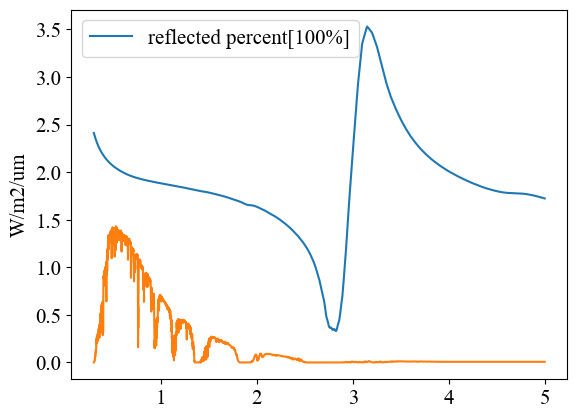

In [20]:
angle = np.where(theta==10)
a = F_dw_os*R2[:,angle]
reflectance = R2[:,angle[0]]*100

plt.plot(lam,reflectance,label="reflected percent[100%]")
plt.plot(lam,F_dw_os)
plt.legend()
plt.ylabel("W/m2/um")
plt.show()

In [21]:
import scipy.integrate as integrate

I1 = integrate.trapz(F_dw_os,lam)*1000
I2 = integrate.trapz(a,lam)*1000
print(I1)
print(I2)

907.2645477836107
[[21.88013635]
 [21.87866284]
 [21.87718893]
 ...
 [15.70485877]
 [15.67158928]
 [15.63817829]]


### 2. all angle to whole shortwave band

89.0909090909091
49.5
89.0909090909091
49.5
83.63636363636364
48.18181818181818
62.72727272727273
41.81818181818182


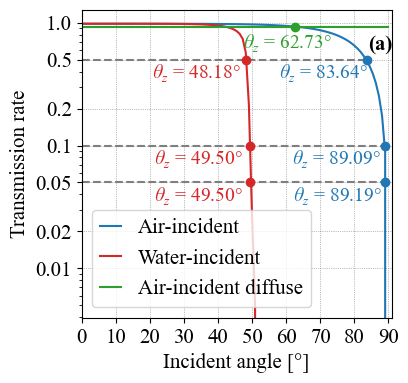

In [75]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import scipy.integrate as integrate

plt.figure(figsize=(4,4))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 15  # 
mpl.rcParams['font.size'] = 15
font = 15
fontfml = 'Times New Roman'

# Your code
temp1 = R * F_dw_os[:, np.newaxis]
temp2 = R2 * F_dw_os[:, np.newaxis]

perct = np.zeros(len(theta))
perct2 = np.zeros(len(theta))

for i in range(len(theta)):
    perct[i] = integrate.trapz(temp1[:, i], lam) * 1000
    perct2[i] = integrate.trapz(temp2[:, i], lam) * 1000
ttt= (1-perct/ 900)
ttt[-1]=0
plt.plot(theta, ttt, label="Air-incident",color="C0")
plt.plot(theta, (1-perct2/ 900), label="Water-incident",color="C3")
#plt.title("Fraction of reflected energy in shortwave bands")


# Set y-axis scale to logarithmic
plt.yscale("log")

# Set y-axis tick locations and labels
yticks = np.array([0.1, 1, 2, 5, 10, 20, 50, 100])/100
plt.yticks(yticks, yticks)

# Draw dashed lines and annotate x-values
y_values = np.array([5,10,50,93])/100
for y in y_values[:-1]:
    x_value = theta[np.abs(perct / 900  - y).argmin()]
    x_value2 = theta[np.abs(perct2 / 900  - y).argmin()]
i=0.1
for y in y_values:
    x_value = theta[np.abs((1-perct/ 900)  - y).argmin()]
    x_value2 = theta[np.abs((1-perct2/ 900)  - y).argmin()]
    #plt.axhline(y, color='gray', linestyle='--')
    if y==21:
        print('no line for 88')
    else:
        plt.plot([0, x_value], [y, y], color="C7", linestyle='--')
    print(x_value)
    if x_value == 89.0909090909091:
        x_value = 89.09+i
        i=i-0.1
    if x_value2 == 50.0:
        x_value2 = 49.5
    print(x_value2)
    if y==0.93:
        plt.plot([x_value], [y], 'o',color="C2")
        plt.annotate(rf"$\theta_z$ = {x_value:.2f}°", (x_value, y), 
                     textcoords="offset points", xytext=(x_value* -0.6 , -12),
                     ha='left', va='center',color="C2",fontsize=14)
    else:
        plt.plot([x_value], [y], 'o',color="C0")
        plt.plot([x_value2], [y], 'o',color="C3")
        plt.annotate(rf"$\theta_z$ = {x_value:.2f}°", (x_value, y), 
                     textcoords="offset points", xytext=(x_value * -0.75, -10),
                     ha='left', va='center',color="C0",fontsize=14)
        plt.annotate(rf"$\theta_z$ = {x_value2:.2f}°", (x_value2, y), 
                     textcoords="offset points", xytext=(x_value2 * -1.4, -10),
                     ha='left', va='center',color="C3",fontsize=14)

y = 1
x_value = theta[np.abs(perct / 900 - y).argmin()]
randsolar = 0.93
plt.plot([0, 90], [randsolar, randsolar], color="C2", linestyle='-',label='Air-incident diffuse')
plt.legend(fontsize=font,handlelength=1)
plt.xlabel("Incident angle [°]", fontsize=15)
plt.ylabel("Transmission rate", fontsize=15)
plt.grid(True)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.xlim(0, 91)
plt.xticks(np.arange(0, 91, 10))  # 91 is used to include 90 in the ticks
plt.text(84, 0.6, '(a)', fontsize=font, weight='bold')

plt.savefig("../../figure/frac_reflect2.png",bbox_inches='tight', dpi=300)
plt.show()

###### x_value

In [520]:
plt.close()

In [19]:
100-17.28

82.72